In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data_test = pd.read_csv('data/05dataBaseTestKeyRec.csv')
data_test.head()

,codCliente,codEstab
0,1182,68644
1,1279,789
2,12884,6263
3,1333,899
4,1366,6180


In [2]:
null_verificator(data_test)

'DATA LIMPIA DE NULOS'

In [3]:
data_test.dtypes

codCliente    int64
codEstab      int64
dtype: object

In [4]:
data_test.shape

(467203, 2)

In [5]:
data_test = data_test.sort_values(by=['codCliente', 'codEstab']).reset_index()
data_test.head()

,index,codCliente,codEstab
0,28161,1,39
1,244120,1,3843
2,40138,1,6314
3,407005,1,12767
4,378968,1,26260


In [6]:
if 'index' in data_test.columns:
    del data_test['index']
    
if 'level_0' in data_test.columns:
    del data_test['level_0']

In [8]:
data_train = pd.read_csv('data/clean_train.csv')
data_train.head()

,codCliente,codEstab,ratingMonto,ratingMonto_norm
0,1,39,0.109690,0.281029
1,1,1194,0.015868,0.032772
2,1,1911,0.059998,0.136354
3,1,2399,0.004772,0.009632
4,1,2425,0.012395,0.025417


In [9]:
data_test.shape, data_train.shape

((467203, 2), (901967, 4))

In [10]:
data_train_1 = data_train.copy()
del data_train_1['ratingMonto_norm']
data_train_2 = data_train.copy()
data_train_2['ratingMonto'] = data_train_2['ratingMonto_norm']
del data_train_2['ratingMonto_norm']
del data_train

In [11]:
data_train_1.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.109690
1,1,1194,0.015868
2,1,1911,0.059998
3,1,2399,0.004772
4,1,2425,0.012395


In [12]:
data_train_2.head()

,codCliente,codEstab,ratingMonto
0,1,39,0.281029
1,1,1194,0.032772
2,1,1911,0.136354
3,1,2399,0.009632
4,1,2425,0.025417


In [13]:
data_train_1.shape, data_train_2.shape

((901967, 3), (901967, 3))

In [15]:
data_train_1.to_csv('data/data_train_1.csv', index=False)
data_train_2.to_csv('data/data_train_2.csv', index=False)

## CARGANDO DATOS DE ESTABLECIMIENTO

In [16]:
data_estab = pd.read_csv('data/clean_estab.csv')
data_estab.head()

,codEstab,flagLimaProvEstab,ubigeoEstab,estab_popularity,giro_popularity,estab_rant,giro_rant,bes_motnth_1,bes_motnth_10,bes_motnth_11,bes_motnth_12,bes_motnth_2,bes_motnth_3,bes_motnth_4,bes_motnth_5,bes_motnth_6,bes_motnth_7,bes_motnth_8,bes_motnth_9
0,1,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0
2,14,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
3,24,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,0,0,0,0,1,0,0
4,25,0,0,0.058234,0.058234,0.01822,0.01822,0,0,0,0,0,1,0,0,0,0,0,0


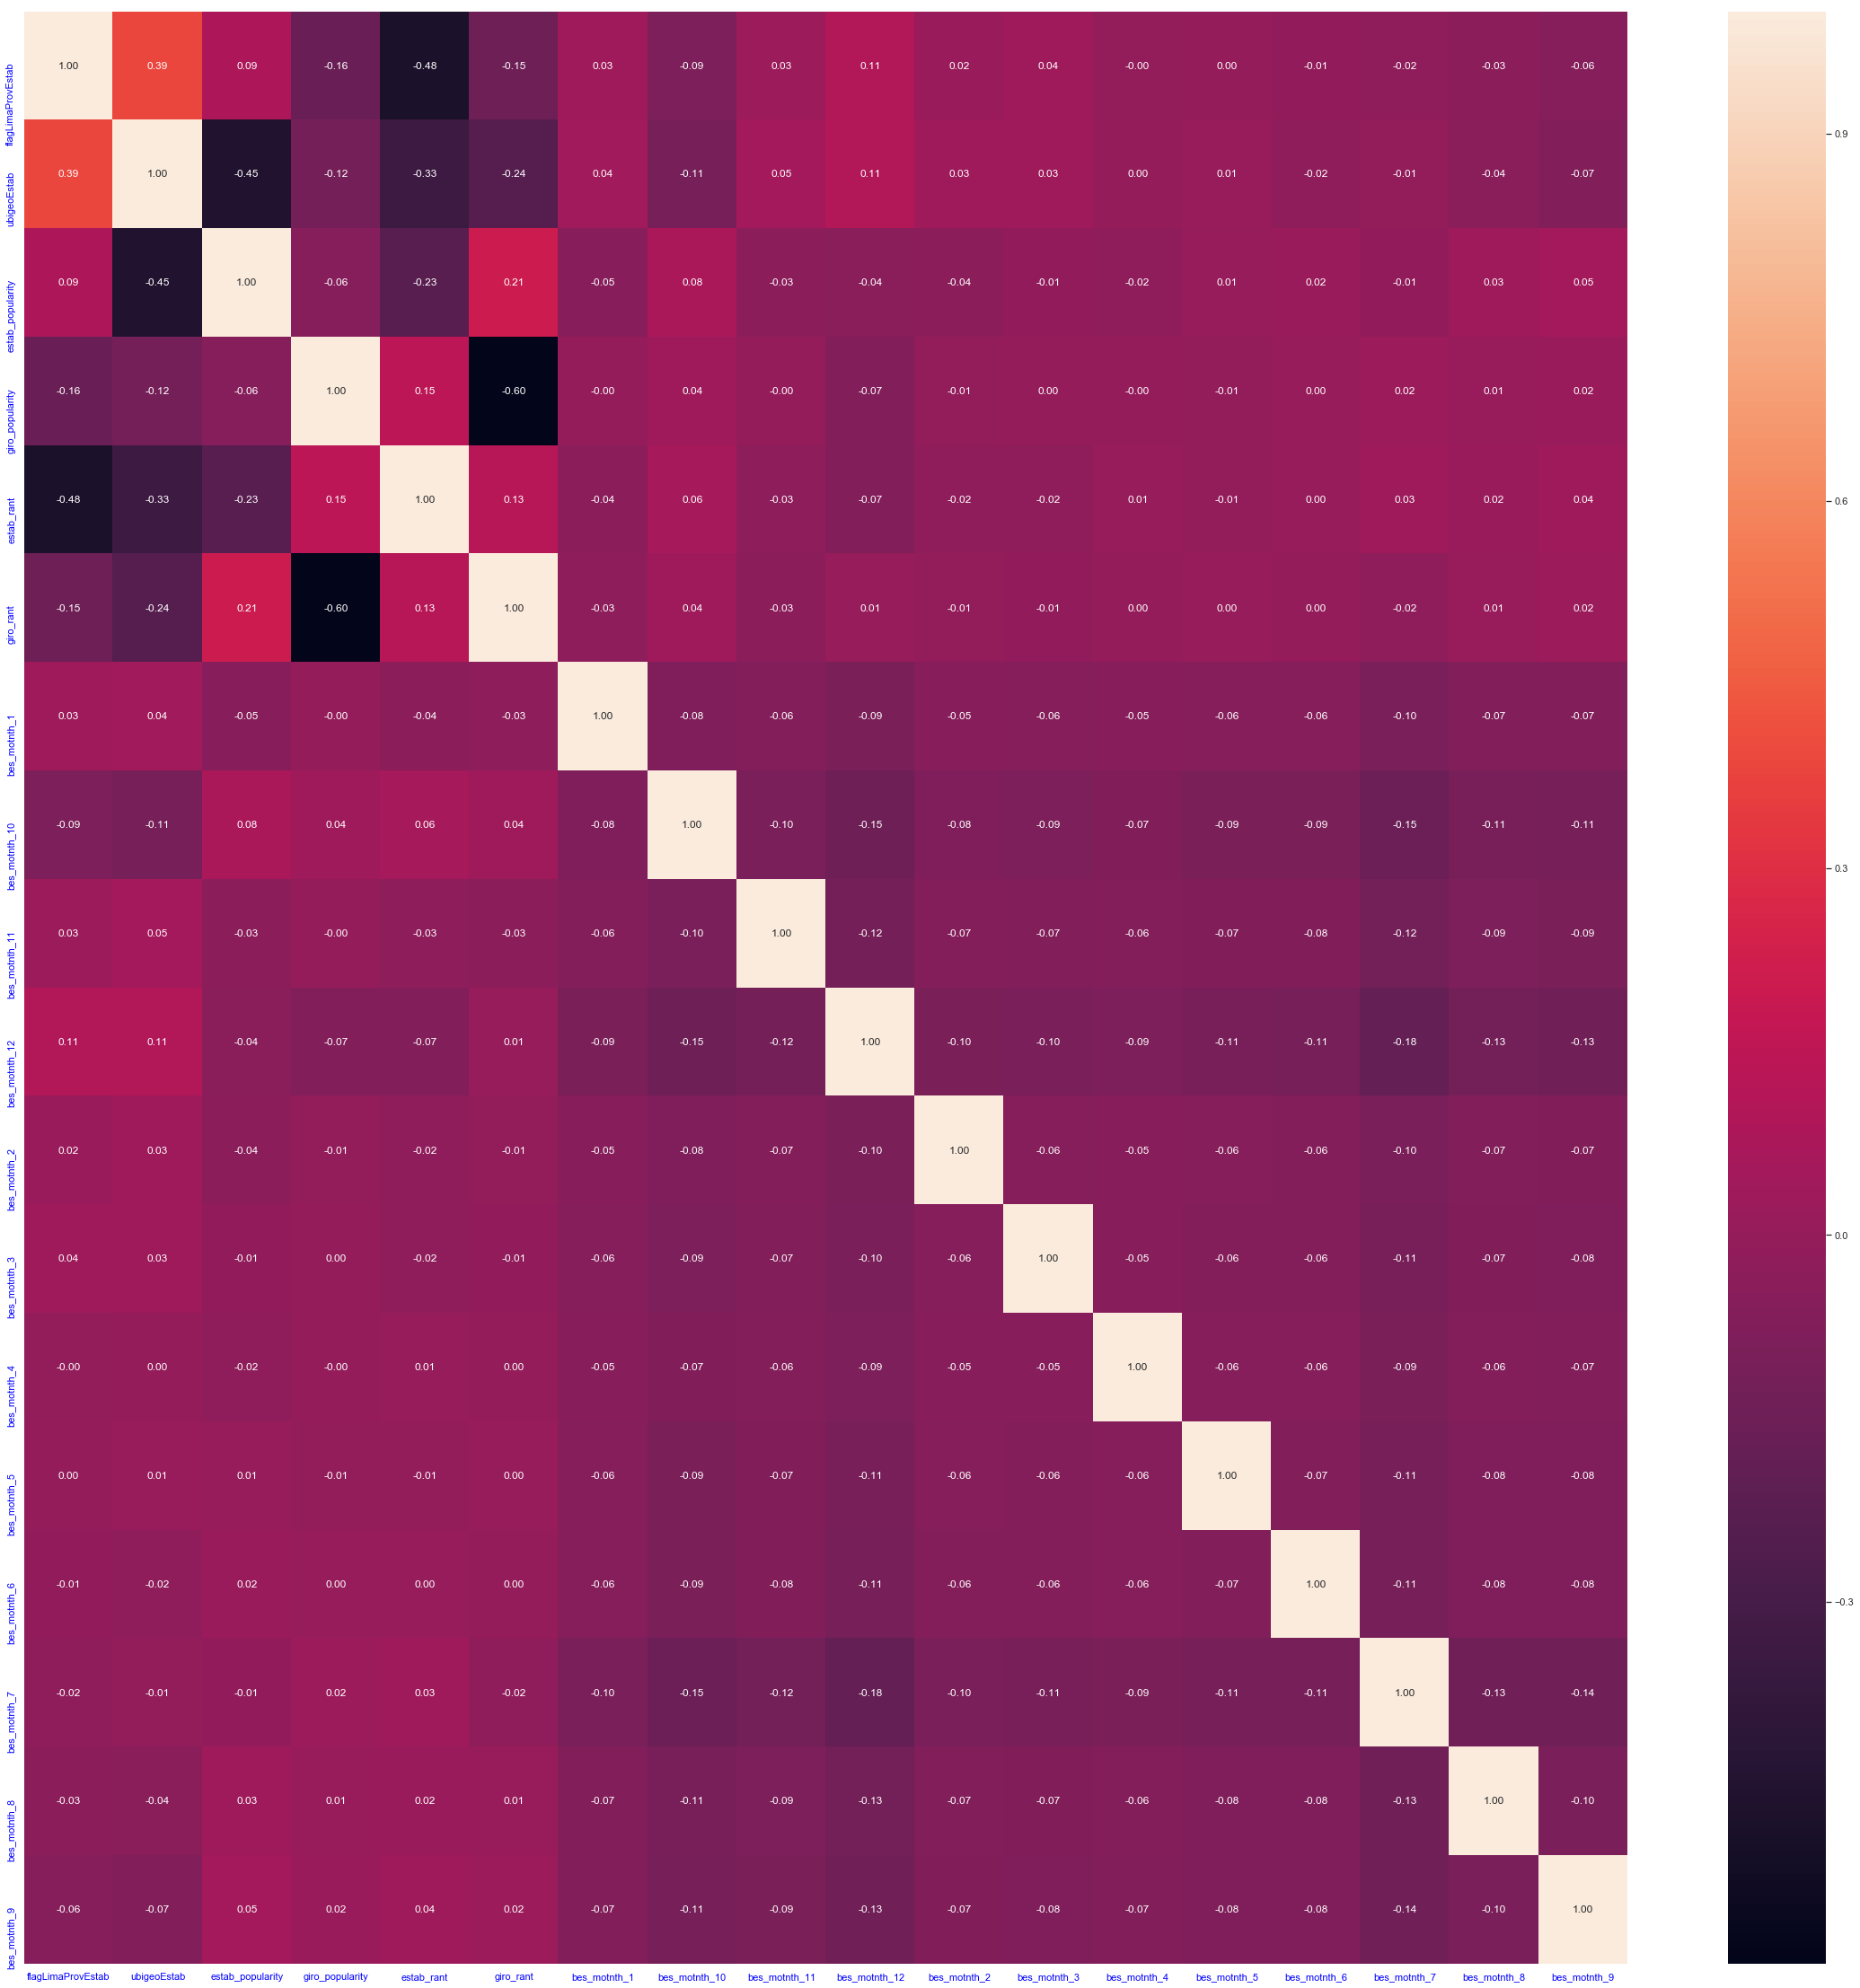

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(40, 40))
sns.set(style="whitegrid")
graf = sns.heatmap(data_estab.iloc[:,1:].corr('spearman'), annot=True, fmt=".2f", ax=ax)
graf.xaxis.label.set_color('blue')
graf.yaxis.label.set_color('blue')
graf.tick_params(colors='blue')

In [24]:
data_estab.columns

Index(['codEstab', 'flagLimaProvEstab', 'ubigeoEstab', 'estab_popularity',
       'giro_popularity', 'estab_rant', 'giro_rant', 'bes_motnth_1',
       'bes_motnth_10', 'bes_motnth_11', 'bes_motnth_12', 'bes_motnth_2',
       'bes_motnth_3', 'bes_motnth_4', 'bes_motnth_5', 'bes_motnth_6',
       'bes_motnth_7', 'bes_motnth_8', 'bes_motnth_9'],
      dtype='object')

## CARGA DATOS PERFIL

In [17]:
data_perfil = pd.read_csv('data/clean_perfil.csv')
data_perfil.head()

,codCliente,flagGenero,flagLimaProvCliente,ubigeoCliente,flagBxi,rangoEdad_Rango1,rangoEdad_Rango2,rangoEdad_Rango3,rangoEdad_Rango4,rangoEdad_Rango5,...,saldoTcEntidad4_Rango2,saldoTcEntidad4_Rango3,saldoTcEntidad4_Rango4,saldoTcEntidad4_Rango5,saldoTcEntidad4_Rango6,perfil_6,perfil_7,perfil_8,perfil_9,perfil_10
0,24041,1,0,360,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,5,1
1,9040,1,1,260,1,0,0,0,1,0,...,0,0,0,0,0,5,5,5,1,5
2,18233,1,1,273,1,0,1,0,0,0,...,0,0,0,0,0,5,6,6,3,3
3,7226,0,1,241,1,0,0,0,0,1,...,1,0,0,0,0,5,5,7,8,8
4,21617,1,1,268,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,5,1


## FUSIONANDO LOS DATASET

In [37]:
backup_data_test.isnull().any()

codCliente    False
codEstab      False
dtype: bool

In [23]:
backup_data_test2 = backup_data_test.copy()

In [24]:
data_test = pd.merge(backup_data_test, data_perfil, how='left', on='codCliente')

In [26]:
data_test = pd.merge(data_test, data_estab, how='left', on='codEstab')

In [27]:
data_test.shape, backup_data_test.shape

((467203, 71), (467203, 2))

In [38]:
data_test.shape

(467203, 69)

In [29]:
data_test[data_test['ubigeoCliente'] == data_test['ubigeoEstab']][['ubigeoCliente', 'ubigeoEstab']].shape

(84, 2)

In [30]:
del data_test['ubigeoCliente']
del data_test['ubigeoEstab']

In [31]:
data_test.columns

Index(['codCliente', 'codEstab', 'flagGenero', 'flagLimaProvCliente',
       'flagBxi', 'rangoEdad_Rango1', 'rangoEdad_Rango2', 'rangoEdad_Rango3',
       'rangoEdad_Rango4', 'rangoEdad_Rango5', 'rangoEdad_Rango6',
       'rangoIngreso_Rango1', 'rangoIngreso_Rango2', 'rangoIngreso_Rango3',
       'rangoIngreso_Rango4', 'rangoIngreso_Rango5', 'rangoIngreso_Rango6',
       'rangoCtdProdAct_Rango1', 'rangoCtdProdAct_Rango3',
       'rangoCtdProdPas_Rango1', 'rangoCtdProdPas_Rango3',
       'rangoCtdProdSeg_Rango1', 'rangoCtdProdSeg_Rango3',
       'rangoCtdProdSeg_Rango4', 'saldoTcEntidad1_Rango1',
       'saldoTcEntidad1_Rango2', 'saldoTcEntidad1_Rango3',
       'saldoTcEntidad1_Rango4', 'saldoTcEntidad1_Rango5',
       'saldoTcEntidad1_Rango6', 'saldoTcEntidad2_Rango1',
       'saldoTcEntidad2_Rango2', 'saldoTcEntidad2_Rango3',
       'saldoTcEntidad2_Rango4', 'saldoTcEntidad2_Rango5',
       'saldoTcEntidad3_Rango1', 'saldoTcEntidad3_Rango2',
       'saldoTcEntidad3_Rango3', 'saldoTcEn

In [32]:
data_test.shape

(467203, 69)

In [33]:
data_test.to_csv('data/data_test.csv', index=False)